<a href="https://colab.research.google.com/github/Zurcaid/MachineLearning/blob/main/PatricLacouth/MLP_exemplo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M**ulti**L**ayer **P**erceptron - **MLP**
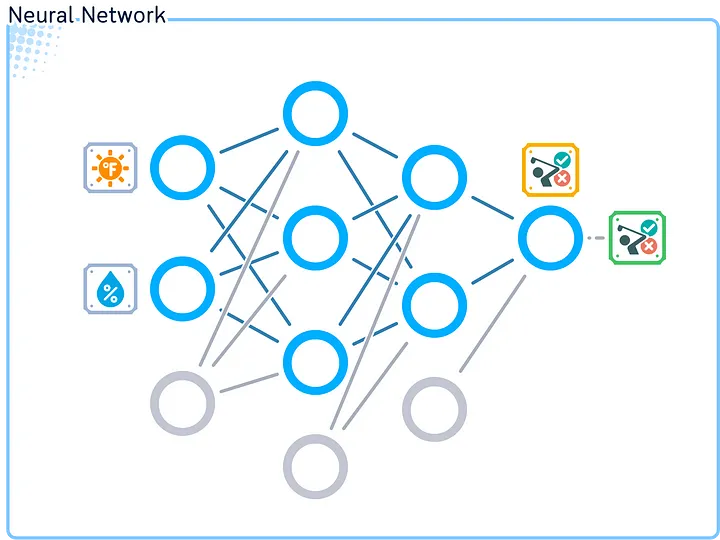

Para ilustrar a aplicação de técnicas de classificação em Inteligência Artificial, como Árvores de Decisão e Perceptrons Multicamadas (MLPs), consideremos o seguinte conjunto de dados que relaciona características físicas e comportamentais de diferentes animais:

| Peso (kg) | Altura (cm) | Gosta de Cenouras (0/1) | Animal   |
|-----------|-------------|-------------------------|----------|
| 10        | 40          | 0                       | Cachorro |
| 4         | 25          | 1                       | Coelho   |
| 5         | 30          | 0                       | Gato     |
| 11        | 50          | 0                       | Cachorro |
| 3         | 20          | 1                       | Coelho   |
| 6         | 35          | 0                       | Gato     |
| 12        | 45          | 0                       | Cachorro |
| 4         | 22          | 1                       | Coelho   |
| 7         | 32          | 0                       | Gato     |
| 8         | 38          | 0                       | Cachorro |
| 2         | 18          | 1                       | Coelho   |
| 9         | 42          | 0                       | Gato     |
| 5         | 28          | 1                       | Coelho   |
| 13        | 55          | 0                       | Cachorro |
| 3         | 23          | 1                       | Coelho   |
| 7         | 33          | 0                       | Gato     |
| 6         | 36          | 0                       | Gato     |
| 10        | 48          | 0                       | Cachorro |
| 9         | 41          | 1                       | Coelho   |
| 5         | 29          | 0                       | Gato     |

Este conjunto de dados apresenta as seguintes variáveis:

- **Peso (kg):** Peso do animal em quilogramas.
- **Altura (cm):** Altura do animal em centímetros.
- **Gosta de Cenouras (0/1):** Indica se o animal gosta (1) ou não gosta (0) de cenouras.
- **Animal:** Espécie do animal (Cachorro, Coelho ou Gato).

O objetivo é utilizar as características físicas e comportamentais (peso, altura e preferência por cenouras) para prever a espécie do animal. Para isso, aplicaremos modelos de classificação, como Árvores de Decisão e MLPs, avaliando seu desempenho na tarefa de classificação com base nos dados fornecidos.

# Importação das bibliotecas

In [ ]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


# Organização e análise dos dados

In [ ]:

# Criação do DataFrame
data = {
    "Peso": [10, 4, 5, 11, 3, 6, 12, 4, 7, 8, 2, 9, 5, 13, 3, 7, 6, 10, 9, 5],
    "Altura": [40, 25, 30, 50, 20, 35, 45, 22, 32, 38, 18, 42, 28, 55, 23, 33, 36, 48, 41, 29],
    "Gosta de cenouras": [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    "Animal": ["Cachorro", "Coelho", "Gato", "Cachorro", "Coelho", "Gato", "Cachorro", "Coelho", "Gato", "Cachorro", "Coelho", "Gato", "Coelho", "Cachorro", "Coelho", "Gato", "Gato", "Cachorro", "Coelho", "Gato"]
}
df = pd.DataFrame(data)

# Separação das variáveis independentes e dependente
X = df[["Peso", "Altura", "Gosta de cenouras"]]
y = df["Animal"]

# Divisão em conjuntos de Treinamento e Teste

Para avaliar a capacidade de generalização do modelo, dividimos os dados em conjuntos de treino e teste.

In [ ]:
# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento

In [ ]:
# Criação e treinamento do modelo
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Teste do modelo treinado

In [ ]:
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia do MLP: {accuracy_mlp * 100:.2f}%")

# Representação do modelo MLP

In [ ]:
def plot_mlp_structure_with_weights(layers, weights, input_labels=None, output_labels=None):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.axis('off')

    layer_width = 2

    x_start = 1

    for i, neurons in enumerate(layers):
        for j in range(neurons):
            y_pos = j - neurons / 2
            plt.scatter(x_start, y_pos, s=400, color="lightblue", edgecolor="black", zorder=2)

            if i == 0 and input_labels is not None:  # Entradas
                plt.text(x_start - 0.5, y_pos, input_labels[j], ha="right", fontsize=10, color="black")
            elif i == len(layers) - 1 and output_labels is not None:  # Saídas
                plt.text(x_start + 0.5, y_pos, output_labels[j], ha="left", fontsize=10, color="black")

            if i < len(layers) - 1:
                next_neurons = layers[i + 1]
                for k in range(next_neurons):
                    next_y_pos = k - next_neurons / 2
                    plt.plot([x_start, x_start + layer_width], [y_pos, next_y_pos], color="gray", zorder=1)

                    # Adiciona pesos nas conexões
                    weight_value = weights[i][j, k]
                    mid_x = (x_start + (x_start + layer_width)) / 2
                    mid_y = (y_pos + next_y_pos) / 2
                    plt.text(mid_x, mid_y, f"{weight_value:.2f}", ha="center", fontsize=8, color="red")

        x_start += layer_width

    plt.title("Estrutura do Perceptron Multicamada com Pesos", fontsize=14)
    plt.show()

In [ ]:
mlp_layers = [3,5,5,3]
weights = mlp.coefs_

input_labels = ["Peso", "Altura", "Gosta de cenouras"]
output_labels = ["Cachorro", "Coelho", "Gato"]

# Gráfico da representação do modelo
plot_mlp_structure_with_weights(
    mlp_layers,
    weights,
    input_labels=input_labels,
    output_labels=output_labels
)

# Interagindo com o modelo treinado

In [ ]:
peso = float(input("Insira o peso do animal (kg): "))
altura = float(input("Insira a altura do animal (cm): "))
gosta_cenouras = int(input("O animal gosta de cenouras? (0 = Não, 1 = Sim): "))

# Criação do DataFrame com os dados de entrada
entrada = pd.DataFrame([[peso, altura, gosta_cenouras]], columns=["Peso", "Altura", "Gosta de cenouras"])

# Predição
predicao = mlp.predict(entrada)
print(f"\nO modelo prevê que o animal é um: {predicao[0]}")

# Predição com as probabilidades
print("\n===== Probabilidades de cada classe =====\n")
probabilidades = mlp.predict_proba(entrada)
for classe, prob in zip(output_labels, probabilidades[0]):
    print(f"Classe: {classe}, Probabilidade: {prob:.2%}")
